In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
data = pd.read_json('train.json')
data

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


In [3]:
data.shape

(39774, 3)

In [4]:
data['cuisine'] = data['cuisine'].astype('category')

In [5]:
from sklearn.model_selection import train_test_split
trainData , testData = train_test_split(data , train_size = 0.75)

In [6]:
trainData.shape

(29830, 3)

In [7]:
trainData.dtypes

id                int64
cuisine        category
ingredients      object
dtype: object

In [8]:
trainData["cuisine"].value_counts()

italian         5902
mexican         4814
southern_us     3251
indian          2247
chinese         1974
french          1954
cajun_creole    1194
thai            1153
japanese        1061
greek            908
spanish          725
korean           646
british          618
vietnamese       604
moroccan         604
filipino         590
irish            478
jamaican         394
russian          359
brazilian        354
Name: cuisine, dtype: int64

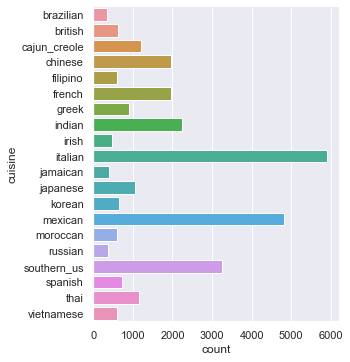

In [9]:
sb.catplot(y = "cuisine", data = trainData, kind = "count")

In [10]:
for i in trainData.index:
    trainData.at[i, "ingredients"] = '#'.join(trainData.at[i, "ingredients"])
    trainData.at[i, "ingredients"] = trainData.at[i, "ingredients"].replace(' ' , '')
    trainData.at[i, "ingredients"] = trainData.at[i, "ingredients"].replace('-' , '')
    trainData.at[i, "ingredients"] = trainData.at[i, "ingredients"].replace('(' , '')
    trainData.at[i, "ingredients"] = trainData.at[i, "ingredients"].replace(')' , '')
    trainData.at[i, "ingredients"] = trainData.at[i, "ingredients"].replace('.' , '')
    trainData.at[i, "ingredients"] = trainData.at[i, "ingredients"].replace(',' , '')
    trainData.at[i, "ingredients"] = trainData.at[i, "ingredients"].replace('%' , '')
    trainData.at[i, "ingredients"] = trainData.at[i, "ingredients"].replace('#' , ' ')

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
matrix = vectorizer.fit_transform(trainData.ingredients)
trainCounts = pd.DataFrame(matrix.toarray(),
                  index=trainData.index,
                  columns=vectorizer.get_feature_names())

trainCounts

,10ozfrozenchoppedspinach,10ozfrozenchoppedspinachthawedandsqueezeddry,145ozdicedtomatoes,14ozsweetenedcondensedmilk,15ozrefriedbeans,1lowfatbuttermilk,1lowfatchocolatemilk,1lowfatcottagecheese,1lowfatmilk,21,...,yuzukosho,za,zatarain,zatarainscreoleseasoning,zest,zestyitaliandressing,zinfandel,ziti,zucchini,zucchiniblossoms
29323,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31322,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6942,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27612,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
20219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1590,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
trainCounts['cuisine'] = trainData['cuisine']
trainCounts['id'] = trainData['id']
trainCounts[['id' , 'cuisine']]

,id,cuisine
29323,16773,jamaican
31322,6216,italian
6942,33424,mexican
27612,3696,italian
20219,26425,italian
...,...,...
30413,25422,filipino
750,25791,french
1590,17857,southern_us
18024,37976,russian


In [12]:
for i in testData.index:
    testData.at[i, "ingredients"] = '#'.join(testData.at[i, "ingredients"])
    testData.at[i, "ingredients"] = testData.at[i, "ingredients"].replace(' ' , '')
    testData.at[i, "ingredients"] = testData.at[i, "ingredients"].replace('-' , '')
    testData.at[i, "ingredients"] = testData.at[i, "ingredients"].replace('(' , '')
    testData.at[i, "ingredients"] = testData.at[i, "ingredients"].replace(')' , '')
    testData.at[i, "ingredients"] = testData.at[i, "ingredients"].replace('.' , '')
    testData.at[i, "ingredients"] = testData.at[i, "ingredients"].replace(',' , '')
    testData.at[i, "ingredients"] = testData.at[i, "ingredients"].replace('%' , '')
    testData.at[i, "ingredients"] = testData.at[i, "ingredients"].replace('#' , ' ')

vectorizer2 = CountVectorizer()
matrix = vectorizer2.fit_transform(testData.ingredients)
testCounts = pd.DataFrame(matrix.toarray(),
                  index=testData.index,
                  columns=vectorizer2.get_feature_names())

testCounts
testCounts['cuisine'] = testData['cuisine']
testCounts['id'] = testData['id']
testCounts[['id' , 'cuisine']]

,id,cuisine
30769,29195,japanese
4090,16724,southern_us
24131,38367,cajun_creole
18157,34677,british
31951,30288,southern_us
...,...,...
6916,39627,mexican
18388,14623,cajun_creole
22998,44813,chinese
18625,2584,mexican


In [13]:
sum = pd.DataFrame(trainCounts.drop(['cuisine','id'] , axis = 1).T.sum(axis = 1))
sum

,0
10ozfrozenchoppedspinach,3
10ozfrozenchoppedspinachthawedandsqueezeddry,2
145ozdicedtomatoes,3
14ozsweetenedcondensedmilk,2
15ozrefriedbeans,3
...,...
zestyitaliandressing,13
zinfandel,8
ziti,22
zucchini,647


In [14]:
top10 = sum.sort_values(by=0 , ascending = False).head(10)
top10 = top10.T
top10

,salt,onions,oliveoil,water,garlic,sugar,garliccloves,butter,groundblackpepper,allpurposeflour
0,13497,6013,5978,5634,5507,4759,4699,3640,3556,3518


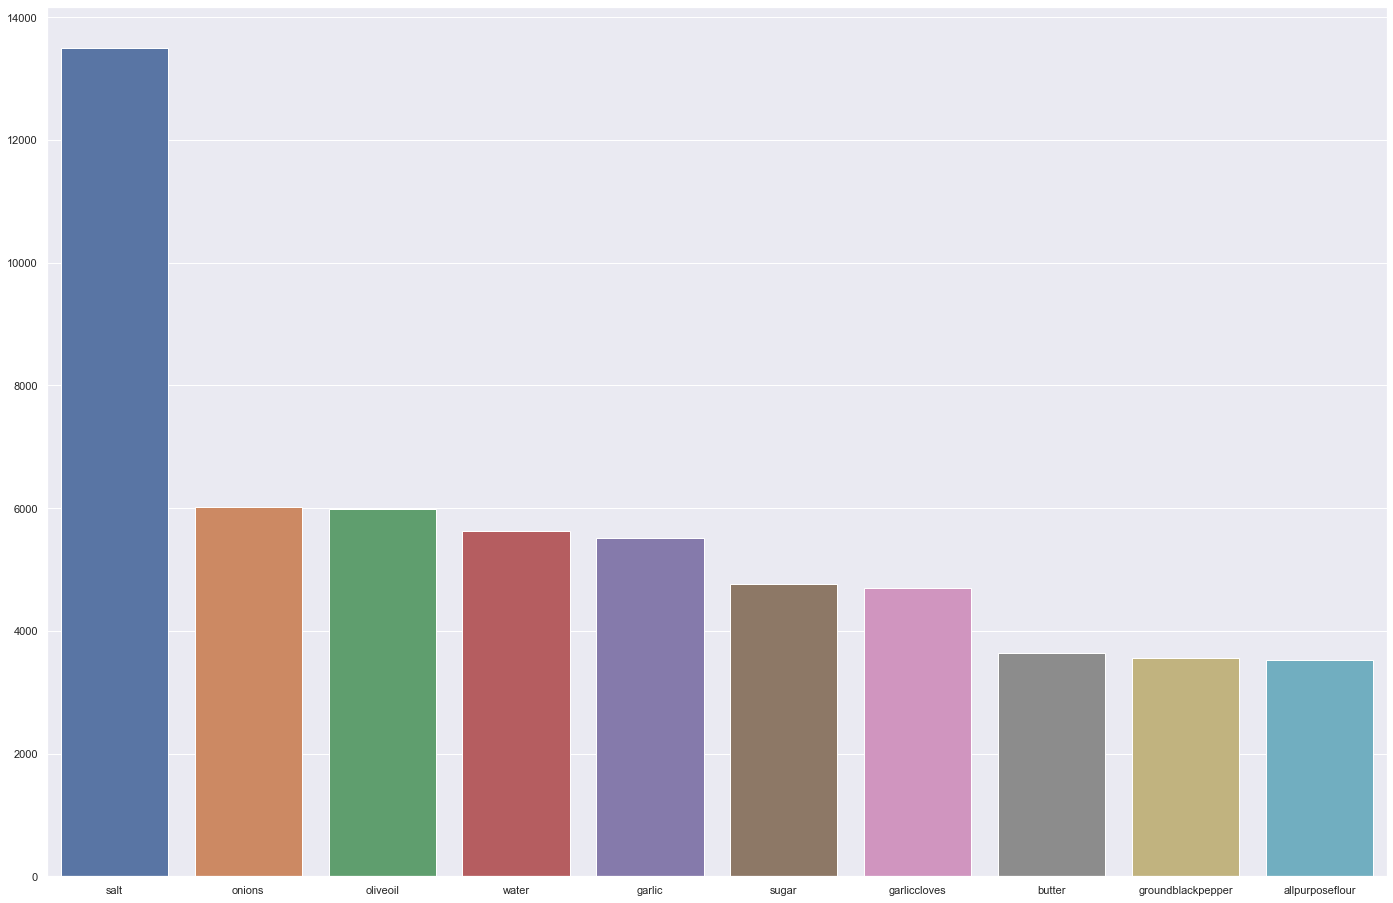

In [15]:
f , axes = plt.subplots(figsize = [24 , 16])
sb.barplot( data = top10 )

In [16]:
cuisine = 'mexican'
pd.DataFrame(pd.DataFrame(trainCounts.drop(['cuisine','id'] , axis = 1).groupby(trainCounts['cuisine']).sum()).T[cuisine].sort_values(ascending = False).head(10))

,mexican
salt,2041
onions,1131
groundcumin,1010
garlic,980
oliveoil,938
chilipowder,901
jalapenochilies,846
sourcream,817
avocado,780
corntortillas,707


In [17]:
top1000 = sum.sort_values(by=0 , ascending = False).head(1000)
top1000.index

Index(['salt', 'onions', 'oliveoil', 'water', 'garlic', 'sugar',
       'garliccloves', 'butter', 'groundblackpepper', 'allpurposeflour',
       ...
       'pitteddate', 'whitesandwichbread', 'turbinado', 'yellowmustard',
       'seedlesscucumber', 'driedcranberries', 'broccolirabe',
       'extrasharpcheddarcheese', 'spanishchorizo', 'frozenspinach'],
      dtype='object', length=1000)

In [18]:
trainX = trainCounts[top1000.index]
trainY = trainCounts['cuisine']
testX = testCounts[top1000.index]
testY = testCounts['cuisine']
trainX

,salt,onions,oliveoil,water,garlic,sugar,garliccloves,butter,groundblackpepper,allpurposeflour,...,pitteddate,whitesandwichbread,turbinado,yellowmustard,seedlesscucumber,driedcranberries,broccolirabe,extrasharpcheddarcheese,spanishchorizo,frozenspinach
29323,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31322,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6942,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27612,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20219,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30413,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
750,1,0,1,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1590,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18024,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(trainX , trainY)

MultinomialNB()

In [20]:
predict = clf.predict(trainX)
predict

array(['jamaican', 'italian', 'mexican', ..., 'italian', 'southern_us',
       'indian'], dtype='<U12')

In [21]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(trainY, predict))

Accuracy: 0.7459269192088501


In [22]:
predict = clf.predict(testX)
print("Accuracy:",metrics.accuracy_score(testY, predict))

Accuracy: 0.7240547063555913
